# <center>Laboratorium 9<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import math
import timeit

***Temat główny:***

Znajdź miejsca zerowe funkcji: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$,

metodami:
* Bisekcji,
* Newtona

Funkcję i jej pochodne należy zaimplementować w *main.py*

***Zadanie 1.***  
Wykonaj wykres funkcji oraz jej pierwszej i drugiej pochodnej (obliczonej analitycznie) na jednym rysunku w przedziale pozwalającym na zgrubne określenie miejsc zerowych. Wykres powinien być odpowiednio opisany. Określ przedziały, w którym znajdują się miejsca zerowe naszej funkcji.

W jaki sposób (wykorzystując pierwszą i drugą pochodną) można znaleźć miejsca zerowe funkcji?

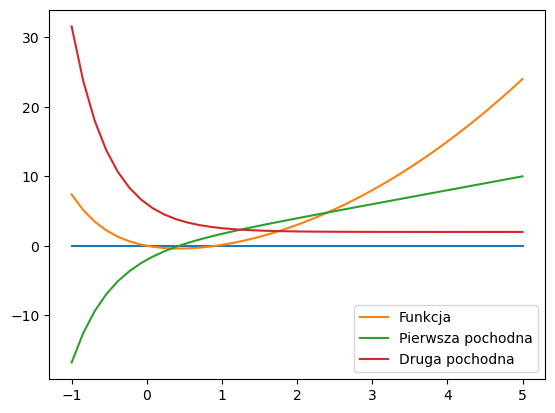

In [2]:
x = np.linspace(-1, 5, 40)
y = np.zeros(40)
plt.plot(x, y)
plt.plot(x, main.fun(x), label = 'Funkcja')
plt.plot(x, main.dfun(x), label = 'Pierwsza pochodna')
plt.plot(x, main.ddfun(x), label = 'Druga pochodna')
plt.legend()

Przedział w którym znajdują się miejsca zerowe to ok. -0.5 do 0.5 i 0.5 do 1.5

***Zadanie 2.***  
Najprostszą metodą do wyznaczenia miejsca zerowego funkcji nieliniowej jest metoda bisekcji. Zaimplementuj [metodę bisekcji](https://en.wikipedia.org/wiki/Bisection_method)

Pamiętaj, że gwarancją zbieżności działania funkcji są założenia:

1) funkcja jest ciągła na danym przedziale $[a,b]$

2) wartość funkcji na końcach przedziału przyjmuje przeciwne znaki (tzn. $f(a)*f(b)<0$)

In [3]:
print(main.bisection(-0.5, 0.1, main.fun, 1e-10, 100 ))
print(main.bisection(0, 1, main.fun, 1e-10, 100))


(-4.656612873077393e-11, 31)
(0.9165625830646604, 31)


Poprawnie znaleziono dwa miejsca zerowe


***Zadanie 3.***  
Inną metodą, wykorzystywaną do poszukiwania miejsca zerowego funkcji jest metoda Newtona. Wykorzystuję ona wartość pierwszej pochodnej do wyznaczenia wartości.

1) zaimplementuj iloraz różnicowy. 
2) wygeneruj wektor 10 elementowy
3) sprawdź działanie funkcji dla danego wektora oraz  $h=0.00001$ oraz z wartościami uzyskanymi z funkcją wyliczoną analityczną.

Zaimplementuj [metodę Newtona](https://en.wikipedia.org/wiki/Newton%27s_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale $[a,b]$

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym $[a,b]$

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak ekstremów lokalnych i punktów przegięcia)


***Zadania 4.***  
Dla głównej funkcji z zadania 1 znajdź miejsca zerowe przy użyciu:

* funkcji root dostępnej w pakiecie scipy.optimize
* funkcji fsolve dostępnej w pakiecie scipy.optimize


In [4]:
print('Przy użyciu funkcji root:')
x0 = 1
root = scipy.optimize.root(main.fun, x0, args=(), method='hybr', jac=None, tol=None, callback=None, options=None)
root = float(root.x[0])
print(root)

print('Przy użyciu funkcji fsolve:')
fsolve = scipy.optimize.fsolve(main.fun, x0, args=(), fprime=None, full_output=0, col_deriv=0, xtol=1.49012e-08, maxfev=0, band=None, epsfcn=None, factor=100, diag=None)
print(fsolve)

Przy użyciu funkcji root:
0.9165625831056987
Przy użyciu funkcji fsolve:
[0.91656258]


***Zadanie 5.***  
Dla głównej funkcji oraz przedziału zdefiniowanego z zadania 1 znajdź miejsca zerowe przy użyciu:

* metody bisekcji
* metody Newtona

z tolerancją $10^{-10}$

Zbadaj dokładność(względem rozwiązania z zadania 4) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

[5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15, 5.693062658151829e-15]


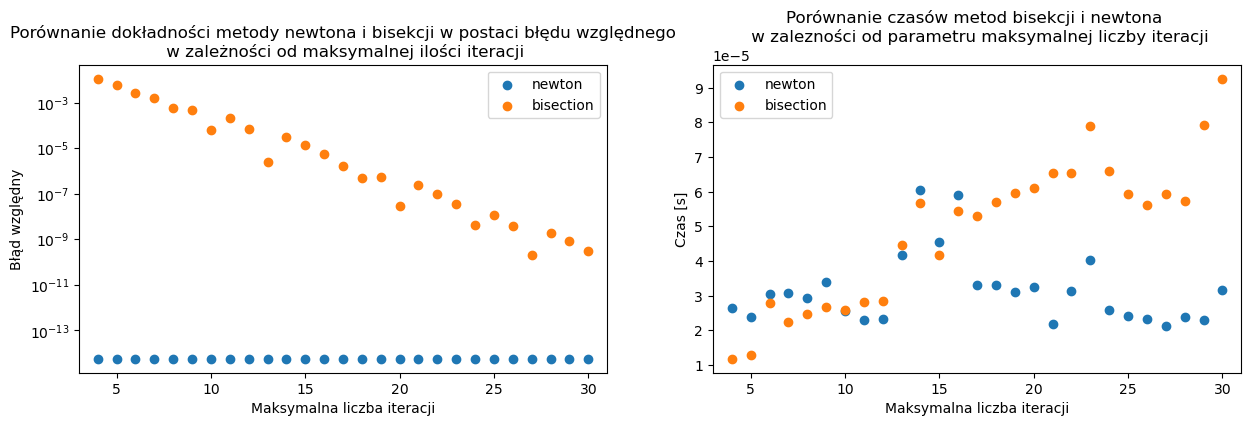

In [5]:

eps = 1e-10
iterations = np.arange(4,  31)
n = 100
newton_errors = []
bisection_errors = []
newton_times = []
bisection_times = []

for i in iterations:
    newton = main.newton(main.fun, main.dfun, main.ddfun, 0, 1, eps, i)
    bisection = main.bisection(0, 1, main.fun,eps, i)
    newton_errors.append(main.relative_error(root, newton[0]))
    bisection_errors.append(main.relative_error(root, bisection[0]))

    newton_times.append(timeit.timeit(lambda : main.newton(main.fun, main.dfun, main.ddfun, 0, 1, eps, i), number = n) / n)
    bisection_times.append(timeit.timeit(lambda : main.bisection(0, 1, main.fun,eps, i),number = n) / n)

print(newton_errors)

fig, (errors, time) = plt.subplots(1,2, figsize=(15,4))
errors.scatter(iterations, newton_errors, label='newton')
errors.scatter(iterations,bisection_errors, label='bisection')
errors.set_ylabel('Błąd względny')
errors.set_title("Porównanie dokładności metody newtona i bisekcji w postaci błędu względnego\n w zależności od maksymalnej ilości iteracji")
errors.set_xlabel("Maksymalna liczba iteracji")
errors.set_xlim([3, 31])
errors.set_yscale('log')
errors.legend()

time.scatter(iterations, newton_times, label='newton')
time.scatter(iterations,bisection_times, label='bisection')
time.set_ylabel('Czas [s]')
time.set_title("Porównanie czasów metod bisekcji i newtona \n w zalezności od parametru maksymalnej liczby iteracji")
time.set_xlabel("Maksymalna liczba iteracji")
time.set_xlim([3, 31])
# time.set_yscale('log')
time.legend()
